In [ ]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 

import keyoscacquire as koa

from time import sleep

# a python file of useful commands!
from infiniivision2000x import *

In [ ]:
# connect to the oscilloscope using it's VISA address 
# time out is 60 seconds
scope = koa.Oscilloscope(address='USB0::2391::6038::MY58104655::INSTR', timeout=60e3)

In [ ]:
# change the acquisition type. 
# we can select between normal, averaging, and high resolution
scope.acq_type = 'NORMal'

In [ ]:
# configure the time per division to be 100 ms 
set_time_per_division(scope, 100e-3)

In [ ]:
# configure the volts per division to be 100 mV  
set_range(scope, 100e-3)

In [ ]:
# this makes sure the scope is acquiring segmented
scope.write(':ACQuire:MODE SEGMented')

In [ ]:
# confim the current acquistion mode 
get_acq_mode(scope)

In [ ]:
# let's acquire 6 segments at the current time per division 
# the more segments you acquire, the smaller time resolution! 
set_seg_count(scope, 6)

In [ ]:
# confirm the number of segments to acquire was properly set 
get_seg_count(scope)

In [ ]:
# once everything is set up, we can call run to start the acquistion 
run(scope)

In [ ]:
# Ask for how many segments have been acquired so far. 
# This command can be called during the oscilloscope makes the acquisition!
get_current_seg_number(scope)

In [ ]:
# if things are taking too long, we can call "stop" to stop the acquisition 
stop(scope)

Analysis of the acquired segments on the oscilloscope

In [ ]:
# look at segment number 1 on the oscilloscope
set_current_seg(scope, 1)
# Ask for the time tag of the selected segment
get_current_seg_timetag(scope)

After acquiring all the segments from the oscilloscope, we can also save the data from the oscilloscope and analyze it on the computer.

In [ ]:
# provide the file name of what you would like the data to be called 
save_segmented_data(scope, "test")

`data/dat2.csv` is a file we acquired by calling the command above. Let's open it.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import csv as c
from pathlib import Path

In [31]:
def csv(filename: str, skiprows = 4):
    """Reads a csv file at a particular location, and extracts the sampling frequency by assuming the first column read in csv file is the time axis, in seconds

    Args:
        filename (std): the path to the file we want to analyze 
        skiprows (int, optional): the number of rows in the data file we want to skip. Defaults to 4.

    Returns:
        A pandas data frame containing the data, and the sampling frequency  
    """
    df = pd.read_csv(filename, delimiter=",", skiprows = skiprows, header=None)
    t = df.iloc[:,0].to_numpy()
    
    # compute fs by taking the average slope of the time axis 
    fs = np.round(1/np.mean(np.gradient(t)))
    print("Rounded to sampling frequency: {} Hz".format(fs))
    print("Actual: {} Hz".format(1/(t[1] - t[0])))
    return df, fs 

In [32]:
dir = Path("../data")
dat = dict() 

for d in dir.glob("*.csv"):
    dat_num = int(d.stem.replace("dat", ""))
    dat[dat_num] = d 
    
# heres a list of all the data we have 
dat

{0: WindowsPath('../data/dat0.csv'),
 1: WindowsPath('../data/dat1.csv'),
 2: WindowsPath('../data/dat2.csv')}

In [33]:
# use the python csv to read the first line of the file. 
with open(dat[2], ) as csvfile: 
    reader = c.reader(csvfile)
    row1 = next(reader)

In [34]:
# this gives us a list of all the starting times of each segment
time_stamp = [float(i) for i in row1[1:]]

In [35]:
df, fs = csv(dat[2], skiprows=3)

Rounded to sampling frequency: 3846.0 Hz
Actual: 3846.1538461549267 Hz


In [39]:
# our data has (rows, columns)
df.shape

(7693, 252)

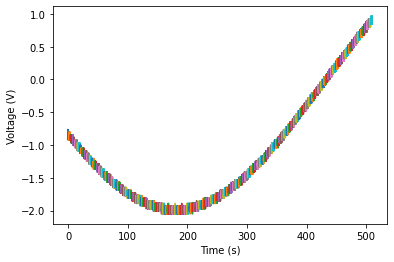

In [61]:
time = df.iloc[:, 0] # the time axis is the 0th column in the data 

for i in range(1, df.shape[1] - 1):
    plt.plot(time + time_stamp[i-1], df.iloc[:, i])
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")

We can zoom into the data between 0 and 5 seconds to see that there are small discontinuities between the acquired segments. 

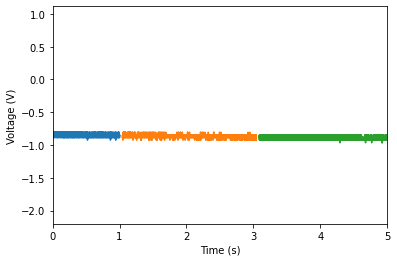

In [63]:
time = df.iloc[:, 0] # the time axis is the 0th column in the data 

for i in range(1, df.shape[1] - 1):
    plt.plot(time + time_stamp[i-1], df.iloc[:, i])
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.xlim(0, 5)